In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [77]:
xa = np.linspace(0, 12*np.pi, 600)
xs = np.linspace(0, 4*np.pi, 200)
raw_spec = np.concatenate((200*np.sin(xs),400*np.sin(0.25*xs), 200*np.sin(xs)), axis=0)

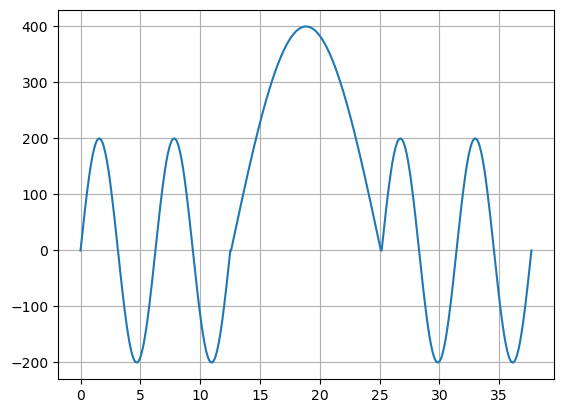

In [78]:
plt.grid()
plt.plot(xa, raw_spec)

In [79]:
fft = np.fft.fft(raw_spec) / len(raw_spec)  
 
fft_magnitude = abs(fft)
shift = np.fft.fftshift(fft_magnitude)

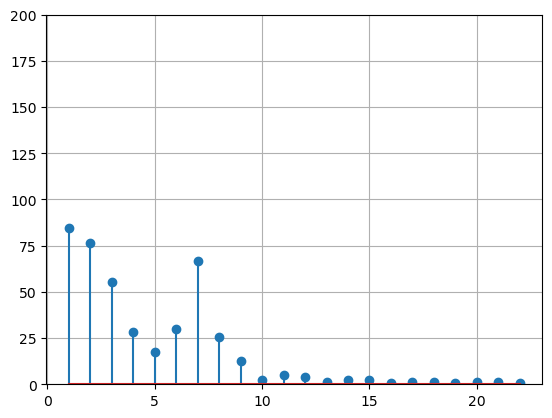

In [81]:
length = len(raw_spec)

fs = length
f = np.round(np.linspace(-(fs / 2), fs / 2, length)[int(length/2):int(length/2)+22])
 
plt.stem(f, shift[int(length/2):int(length/2)+22]) 

plt.ylim(0,200)
plt.grid()

plt.savefig("./ffttest.jpg")
plt.show()

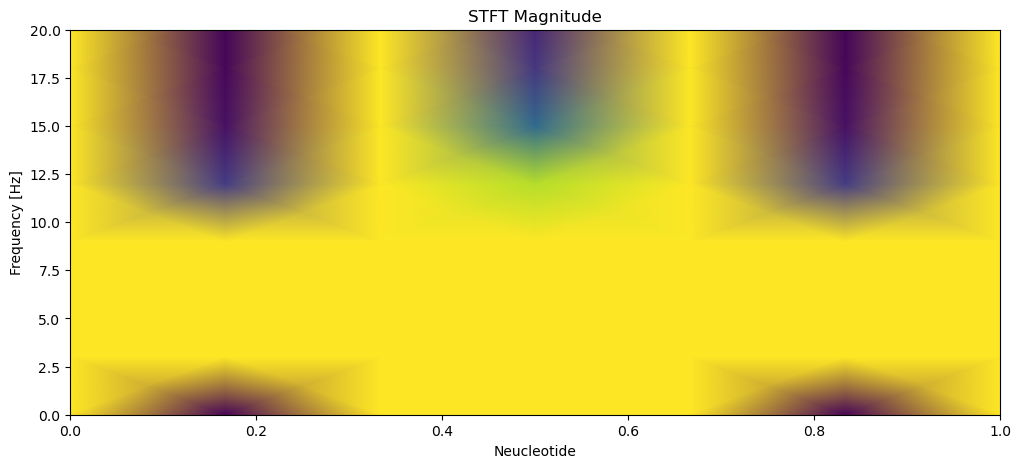

In [107]:
from scipy import signal

def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Neucleotide'); plt.ylim([0, 20]); plt.show()

def calc_stft(nperseg):
    f, t, Zxx = signal.stft(raw_spec, length, nperseg=nperseg)
    draw_stft(f, t, Zxx)

calc_stft(200)